In [1]:
# Import required library
import pandas as pd
import warnings

# Suppress all warnings (including openpyxl and dtype warnings)
warnings.filterwarnings("ignore")

# Define local file paths for each dataset
file_paths = {
    "bls_unemployment": "/Users/justinpizzoferrato/Desktop/DCS680/Rent Analysis/SeriesReport-20250719175049_8a84c4.xlsx",
    "eviction_all_sites": "/Users/justinpizzoferrato/Desktop/DCS680/Rent Analysis/all_sites_monthly_2020_2021_eviction.csv",
    "zillow_city": "/Users/justinpizzoferrato/Desktop/DCS680/Rent Analysis/City_zori_uc_sfrcondomfr_sm_month.csv",
    "eviction_houston": "/Users/justinpizzoferrato/Desktop/DCS680/Rent Analysis/houston_monthly_2020_2021_eviction.csv",
    "zillow_landing": "/Users/justinpizzoferrato/Desktop/DCS680/Rent Analysis/main_landing_page_data.csv",
    "zillow_national_growth": "/Users/justinpizzoferrato/Desktop/DCS680/Rent Analysis/National_zorf_growth_uc_sfr_sm_month.csv",
    "zillow_zip": "/Users/justinpizzoferrato/Desktop/DCS680/Rent Analysis/Zip_zori_uc_sfrcondomfr_sm_month.csv"
}

# Create a dictionary to hold the loaded DataFrames
datasets = {}

# Load each file based on its extension
for name, path in file_paths.items():
    if path.endswith(".csv"):
        datasets[name] = pd.read_csv(path)
    elif path.endswith(".xlsx"):
        datasets[name] = pd.read_excel(path)

# Display the names and shapes of the loaded datasets
for name, df in datasets.items():
    print(f"{name}: {df.shape}")

bls_unemployment: (135, 6)
eviction_all_sites: (745752, 9)
zillow_city: (3768, 134)
eviction_houston: (81673, 8)
zillow_landing: (3007, 7)
zillow_national_growth: (1, 8)
zillow_zip: (7488, 135)


In [3]:
# Reload the Excel file, skipping the top 10 rows (adjust if needed)
df_bls = pd.read_excel(
    file_paths["bls_unemployment"],
    skiprows=10  # Change to 6, 8, or more depending on structure
)

# Overwrite the original in the dataset dictionary
datasets["bls_unemployment"] = df_bls

# Display cleaned preview
print("Cleaned BLS Unemployment Dataset Preview")
print("-" * 50)
print(df_bls.info())
display(df_bls.head())

Cleaned BLS Unemployment Dataset Preview
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               125 non-null    int64  
 1   Period             125 non-null    object 
 2   labor force        125 non-null    int64  
 3   employment         125 non-null    int64  
 4   unemployment       125 non-null    int64  
 5   unemployment rate  125 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 6.0+ KB
None


,Year,Period,labor force,employment,unemployment,unemployment rate
0,2015,Jan,74614,71580,3034,4.1
1,2015,Feb,74701,71705,2996,4.0
2,2015,Mar,74300,71437,2863,3.9
3,2015,Apr,74826,72200,2626,3.5
4,2015,May,75000,72104,2896,3.9


In [5]:
# Preview the eviction_all_sites dataset
df_eviction = datasets["eviction_all_sites"]

print("Eviction Dataset Overview")
print("-" * 60)
print(df_eviction.info())
display(df_eviction.head(10))  # Show first 10 rows for broader context

Eviction Dataset Overview
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745752 entries, 0 to 745751
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   city                              745752 non-null  object 
 1   type                              745752 non-null  object 
 2   GEOID                             745752 non-null  object 
 3   racial_majority                   743387 non-null  object 
 4   month                             745752 non-null  object 
 5   filings_2020                      745752 non-null  int64  
 6   filings_avg                       745752 non-null  float64
 7   filings_avg_prepandemic_baseline  745752 non-null  float64
 8   last_updated                      11528 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 51.2+ MB
None


,city,type,GEOID,racial_majority,month,filings_2020,filings_avg,filings_avg_prepandemic_baseline,last_updated
0,"Albuquerque, NM",Census Tract,35001000107,White,01/2020,8,0.5,5.333,NaN
1,"Albuquerque, NM",Census Tract,35001000107,White,02/2020,14,0.0,9.000,NaN
2,"Albuquerque, NM",Census Tract,35001000107,White,03/2020,10,2.5,5.667,NaN
3,"Albuquerque, NM",Census Tract,35001000107,White,04/2020,5,4.0,8.333,NaN
4,"Albuquerque, NM",Census Tract,35001000107,White,05/2020,0,0.5,6.667,NaN
5,"Albuquerque, NM",Census Tract,35001000107,White,06/2020,0,4.0,11.333,NaN
6,"Albuquerque, NM",Census Tract,35001000107,White,07/2020,2,2.5,7.333,NaN
7,"Albuquerque, NM",Census Tract,35001000107,White,08/2020,0,4.0,11.000,NaN
8,"Albuquerque, NM",Census Tract,35001000107,White,09/2020,0,2.0,12.333,NaN
9,"Albuquerque, NM",Census Tract,35001000107,White,10/2020,0,4.0,12.333,NaN


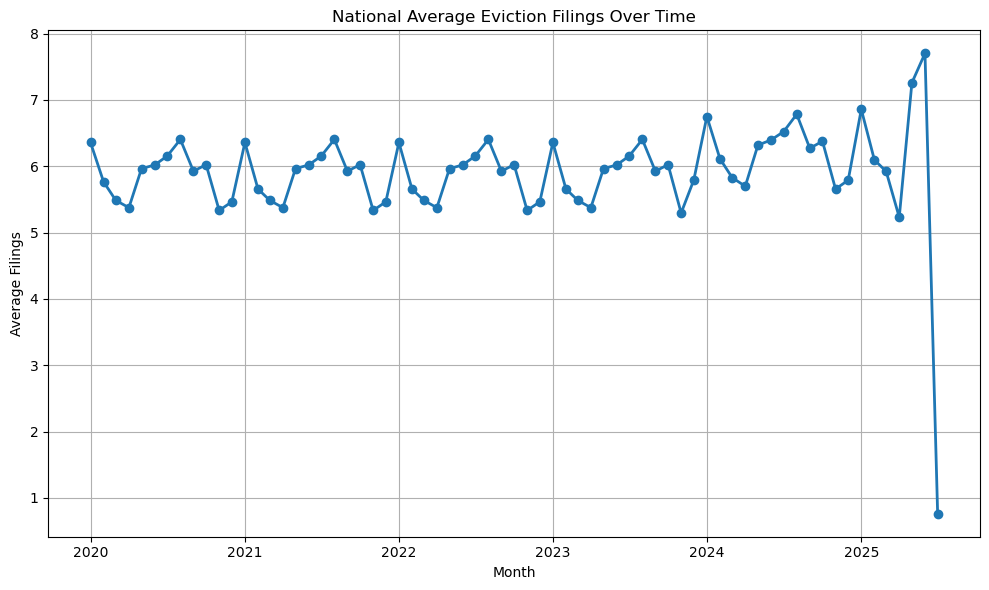

In [7]:
# --- Analyze Monthly Eviction Filing Averages Over Time ---

# Convert 'month' column to datetime for temporal analysis
df_eviction["month"] = pd.to_datetime(df_eviction["month"], format="%m/%Y", errors="coerce")

# Filter data to only valid parsed dates
df_eviction = df_eviction[df_eviction["month"].notnull()]

# Group by month and calculate average filings per month
monthly_avg = df_eviction.groupby("month")["filings_avg"].mean().reset_index()

# Plot the national average eviction filings trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg["month"], monthly_avg["filings_avg"], marker="o", linewidth=2)
plt.title("National Average Eviction Filings Over Time")
plt.xlabel("Month")
plt.ylabel("Average Filings")
plt.grid(True)
plt.tight_layout()
plt.show()

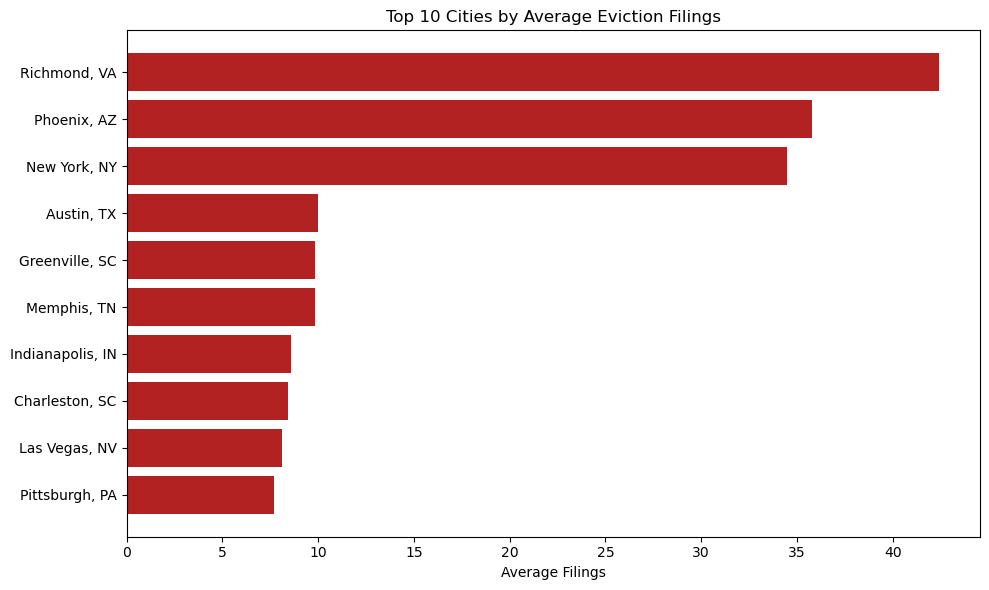

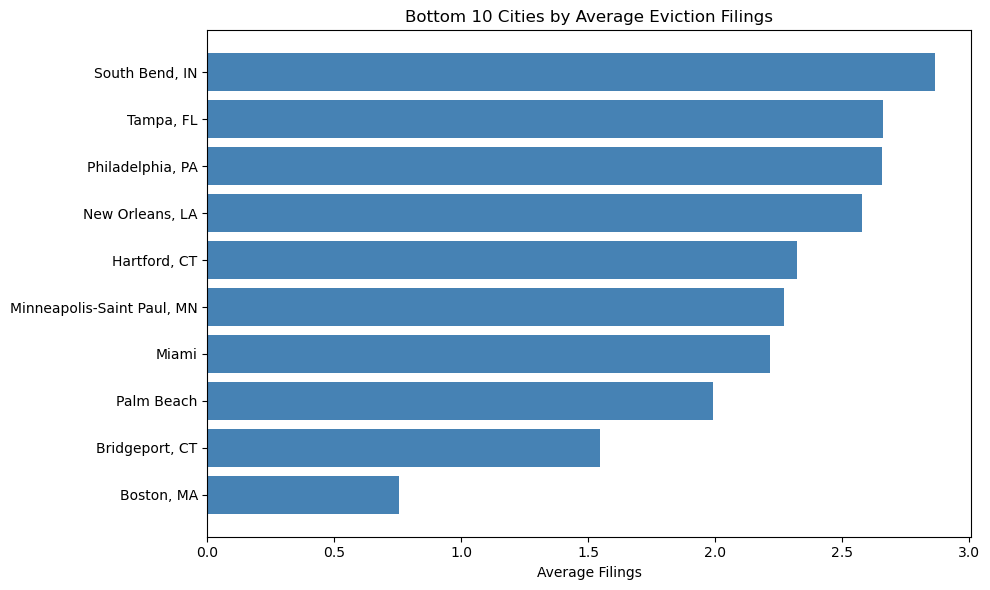

In [9]:
# --- Identify Jurisdictions with Highest and Lowest Eviction Filing Averages ---

# Group by city and calculate overall average eviction filings
city_avg = (
    df_eviction.groupby("city")["filings_avg"]
    .mean()
    .reset_index()
    .sort_values(by="filings_avg", ascending=False)
)

# View top 10 cities with highest average eviction filings
top_10_cities = city_avg.head(10)

# View bottom 10 cities (excluding zero filings)
bottom_10_cities = city_avg[city_avg["filings_avg"] > 0].tail(10)

# Plot top 10 eviction cities
plt.figure(figsize=(10, 6))
plt.barh(top_10_cities["city"], top_10_cities["filings_avg"], color="firebrick")
plt.xlabel("Average Filings")
plt.title("Top 10 Cities by Average Eviction Filings")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot bottom 10 eviction cities
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_cities["city"], bottom_10_cities["filings_avg"], color="steelblue")
plt.xlabel("Average Filings")
plt.title("Bottom 10 Cities by Average Eviction Filings")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

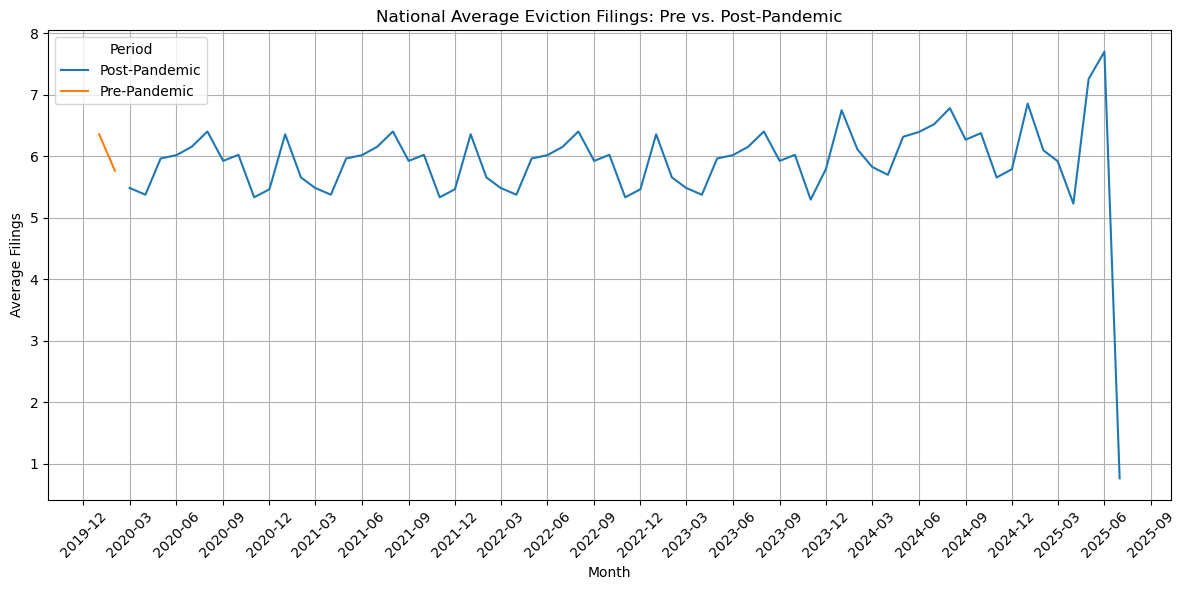

In [11]:
# --- Compare Average Eviction Filings Pre- and Post-Pandemic ---

import matplotlib.dates as mdates

# Convert 'month' column again if needed
df_eviction["month"] = pd.to_datetime(df_eviction["month"], format="%m/%Y", errors="coerce")

# Define pre- and post-pandemic periods
cutoff_date = pd.to_datetime("2020-03-01")

# Tag periods
df_eviction["period"] = df_eviction["month"].apply(lambda x: "Pre-Pandemic" if x < cutoff_date else "Post-Pandemic")

# Group by period and month for aggregation
period_trends = (
    df_eviction.groupby(["period", "month"])["filings_avg"]
    .mean()
    .reset_index()
)

# Plot: Pre vs. Post Trend Line
plt.figure(figsize=(12, 6))
for label, df_group in period_trends.groupby("period"):
    plt.plot(df_group["month"], df_group["filings_avg"], label=label)

# Format and style the chart
plt.title("National Average Eviction Filings: Pre vs. Post-Pandemic")
plt.xlabel("Month")
plt.ylabel("Average Filings")
plt.legend(title="Period")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
print(datasets.keys())

dict_keys(['bls_unemployment', 'eviction_all_sites', 'zillow_city', 'eviction_houston', 'zillow_landing', 'zillow_national_growth', 'zillow_zip'])


In [37]:
# Ensure both eviction and rent datasets are properly loaded
df_eviction = datasets["eviction_all_sites"].copy()
df_rent = datasets["zillow_zip"].copy()

# Inspect rent dataset columns
print("Zillow ZIP Dataset Columns:", df_rent.columns)

# Melt wide-format rent data to long-format with 'month' and 'zori'
df_rent_long = df_rent.melt(
    id_vars=["RegionID"],  # Use 'RegionID' as the ZIP-level ID
    var_name="month",
    value_name="zori"
)

# Standardize 'month' format in both datasets
df_eviction["month"] = pd.to_datetime(df_eviction["month"], format="%m/%Y", errors="coerce").dt.to_period("M")
df_rent_long["month"] = pd.to_datetime(df_rent_long["month"], errors="coerce").dt.to_period("M")

# Drop rows missing merge keys or values
df_eviction = df_eviction.dropna(subset=["month", "filings_avg"])
df_rent_long = df_rent_long.dropna(subset=["month", "zori"])

# Rename RegionID → GEOID for consistent merging
df_rent_long.rename(columns={"RegionID": "GEOID"}, inplace=True)

# Convert both to strings for safe join
df_eviction["GEOID"] = df_eviction["GEOID"].astype(str)
df_rent_long["GEOID"] = df_rent_long["GEOID"].astype(str)

# Merge datasets on GEOID and month
zip_month_merged = pd.merge(
    df_eviction,
    df_rent_long,
    on=["GEOID", "month"],
    how="inner"
)

# Preview results
print("\n✅ Merged Eviction-Rent ZIP-Month Dataset:")
print(zip_month_merged.info())
display(zip_month_merged.head())

Zillow ZIP Dataset Columns: Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2015-01-31',
       ...
       '2024-09-30', '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
       '2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31', '2025-06-30'],
      dtype='object', length=135)

✅ Merged Eviction-Rent ZIP-Month Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype    
---  ------                            --------------  -----    
 0   city                              482 non-null    object   
 1   type                              482 non-null    object   
 2   GEOID                             482 non-null    object   
 3   racial_majority                   482 non-null    object   
 4   month                             482 non-null    period[M]
 5   filings_2020                   

,city,type,GEOID,racial_majority,month,filings_2020,filings_avg,filings_avg_prepandemic_baseline,last_updated,zori
0,"Austin, TX",Zip Code,76574,Other,2020-01,0,0.0,0.0,NaN,1011.08393
1,"Austin, TX",Zip Code,76574,Other,2020-02,0,0.0,0.0,NaN,1008.717347
2,"Austin, TX",Zip Code,76574,Other,2020-03,0,0.0,0.0,NaN,1003.644977
3,"Austin, TX",Zip Code,76574,Other,2020-04,0,0.0,0.0,NaN,1020.377615
4,"Austin, TX",Zip Code,76574,Other,2020-05,0,0.0,0.0,NaN,1039.404727


Pearson correlation between rent (ZORI) and eviction filings: -0.07


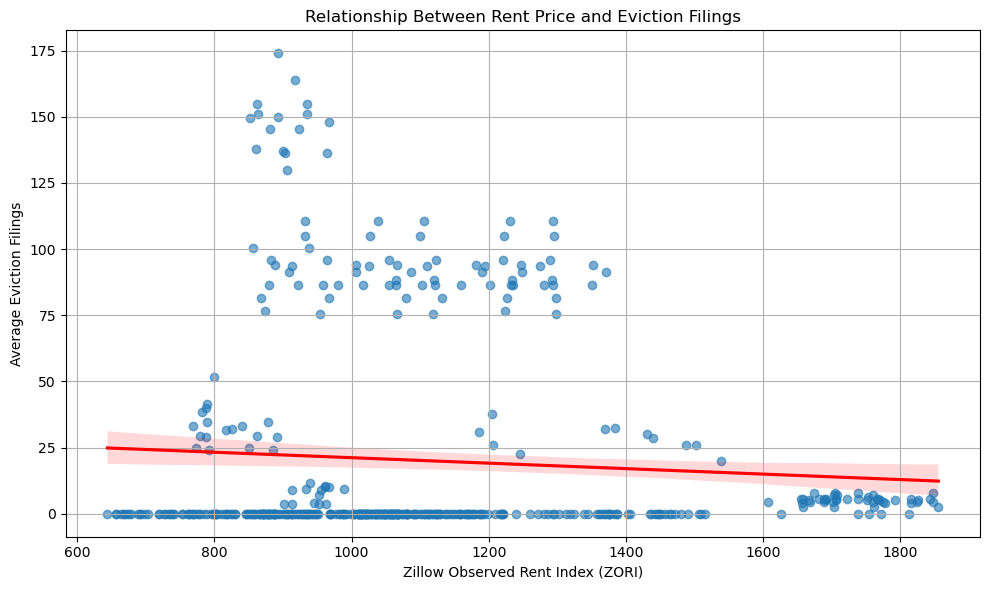

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create a working copy and ensure numeric types
df_temp = zip_month_merged.copy()
df_temp["filings_avg"] = pd.to_numeric(df_temp["filings_avg"], errors="coerce")
df_temp["zori"] = pd.to_numeric(df_temp["zori"], errors="coerce")

# Drop rows with missing data
df_clean = df_temp.dropna(subset=["filings_avg", "zori"])

# Check if any valid data remains
if df_clean.empty:
    print("No data available after filtering. Please check values.")
else:
    # Calculate and print Pearson correlation
    correlation = df_clean["filings_avg"].corr(df_clean["zori"])
    print(f"Pearson correlation between rent (ZORI) and eviction filings: {correlation:.2f}")

    # Plot relationship with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=df_clean,
        x="zori",
        y="filings_avg",
        line_kws={"color": "red"},
        scatter_kws={"alpha": 0.6}
    )
    plt.title("Relationship Between Rent Price and Eviction Filings")
    plt.xlabel("Zillow Observed Rent Index (ZORI)")
    plt.ylabel("Average Eviction Filings")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [57]:
# Load BLS unemployment dataset
df_bls = datasets["bls_unemployment"].copy()

# Convert 'Year' and 'Period' to a single monthly datetime column
df_bls["month"] = pd.to_datetime(df_bls["Year"].astype(str) + "-" + df_bls["Period"], format="%Y-%b", errors="coerce")

# Convert to Period[M] to match zip_month_merged
df_bls["month"] = df_bls["month"].dt.to_period("M")

# Keep only necessary columns and rename
df_bls_trimmed = df_bls[["month", "unemployment rate"]].rename(columns={"unemployment rate": "unemp_rate"})

# Ensure zip_month_merged['month'] is also Period[M] type
if zip_month_merged["month"].dtype != "period[M]":
    zip_month_merged["month"] = pd.to_datetime(zip_month_merged["month"]).dt.to_period("M")

# Merge on 'month'
model_df = pd.merge(zip_month_merged, df_bls_trimmed, on="month", how="left")

# Preview
print("\n✅ Merged model dataset with unemployment:")
print(model_df.info())
display(model_df.head())


✅ Merged model dataset with unemployment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype    
---  ------                            --------------  -----    
 0   city                              482 non-null    object   
 1   type                              482 non-null    object   
 2   GEOID                             482 non-null    object   
 3   racial_majority                   482 non-null    object   
 4   month                             482 non-null    period[M]
 5   filings_2020                      482 non-null    int64    
 6   filings_avg                       482 non-null    float64  
 7   filings_avg_prepandemic_baseline  482 non-null    float64  
 8   last_updated                      0 non-null      object   
 9   zori                              482 non-null    object   
 10  unemp_rate                        458 non-null    float64  
dtypes:

,city,type,GEOID,racial_majority,month,filings_2020,filings_avg,filings_avg_prepandemic_baseline,last_updated,zori,unemp_rate
0,"Austin, TX",Zip Code,76574,Other,2020-01,0,0.0,0.0,NaN,1011.08393,3.0
1,"Austin, TX",Zip Code,76574,Other,2020-02,0,0.0,0.0,NaN,1008.717347,2.9
2,"Austin, TX",Zip Code,76574,Other,2020-03,0,0.0,0.0,NaN,1003.644977,4.4
3,"Austin, TX",Zip Code,76574,Other,2020-04,0,0.0,0.0,NaN,1020.377615,8.3
4,"Austin, TX",Zip Code,76574,Other,2020-05,0,0.0,0.0,NaN,1039.404727,8.2


In [59]:
import statsmodels.api as sm
import numpy as np

# Select and coerce the columns we need
model_data = model_df[["filings_avg", "zori", "unemp_rate"]].copy()

# Force numeric conversion and identify coercion errors
for col in model_data.columns:
    model_data[col] = pd.to_numeric(model_data[col], errors="coerce")

# Drop any rows with missing values
model_data = model_data.dropna()

# Confirm shape before proceeding
print("Final dataset shape for modeling:", model_data.shape)
print("Column types:\n", model_data.dtypes)

# If there's no data left, exit gracefully
if model_data.empty:
    print("No data available for regression modeling. Please check preprocessing.")
else:
    # Define dependent and independent variables
    X = model_data[["zori", "unemp_rate"]]
    y = model_data["filings_avg"]

    # Add constant term for intercept
    X = sm.add_constant(X)

    # Fit OLS model
    model = sm.OLS(y, X).fit()

    # Print results
    print(model.summary())

Final dataset shape for modeling: (458, 3)
Column types:
 filings_avg    float64
zori           float64
unemp_rate     float64
dtype: object
                            OLS Regression Results                            
Dep. Variable:            filings_avg   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.279
Date:                Sat, 26 Jul 2025   Prob (F-statistic):            0.00542
Time:                        10:46:26   Log-Likelihood:                -2331.8
No. Observations:                 458   AIC:                             4670.
Df Residuals:                     455   BIC:                             4682.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

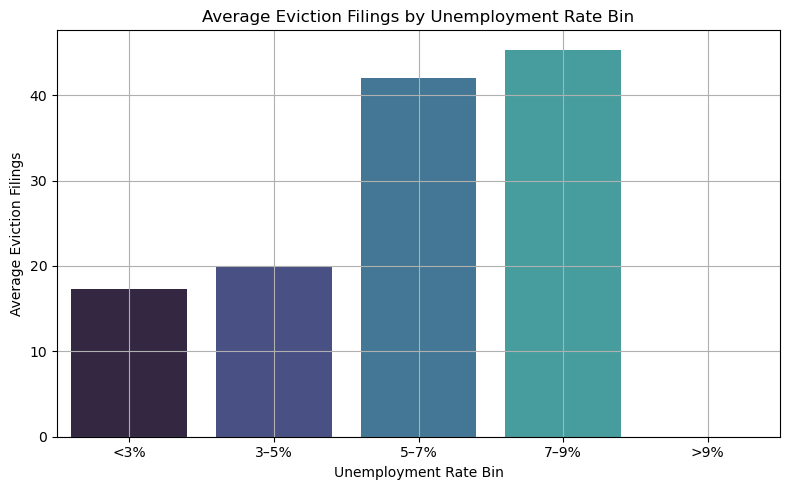

In [61]:
# Bin unemployment rate into categories
model_df['unemp_bin'] = pd.cut(
    model_df['unemp_rate'],
    bins=[0, 3, 5, 7, 9, np.inf],
    labels=['<3%', '3–5%', '5–7%', '7–9%', '>9%']
)

# Compute mean filings per bin
eviction_by_unemp = model_df.groupby('unemp_bin')['filings_avg'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=eviction_by_unemp, x='unemp_bin', y='filings_avg', palette='mako')
plt.title('Average Eviction Filings by Unemployment Rate Bin')
plt.xlabel('Unemployment Rate Bin')
plt.ylabel('Average Eviction Filings')
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
# Compute ZORI standard deviation by ZIP
zori_volatility = (
    zip_month_merged.groupby('GEOID')['zori'].std()
    .reset_index().rename(columns={'zori': 'zori_std'})
)

# Join with city information for context
zori_volatility = zori_volatility.merge(
    model_df[['GEOID', 'city']].drop_duplicates(), on='GEOID', how='left'
)

# Display top 10 volatile ZIPs
zori_volatility.sort_values('zori_std', ascending=False).head(10)

,GEOID,zori_std,city
0,76574,156.389258,"Austin, TX"
22,85345,141.091293,"Phoenix, AZ"
14,85080,112.831969,"Phoenix, AZ"
6,78733,81.457860,"Austin, TX"
12,85071,75.850827,"Phoenix, AZ"
11,85070,73.071768,"Phoenix, AZ"
23,85387,63.416891,"Phoenix, AZ"
20,85335,62.365059,"Phoenix, AZ"
8,78760,54.246086,"Austin, TX"
3,78730,51.229516,"Austin, TX"


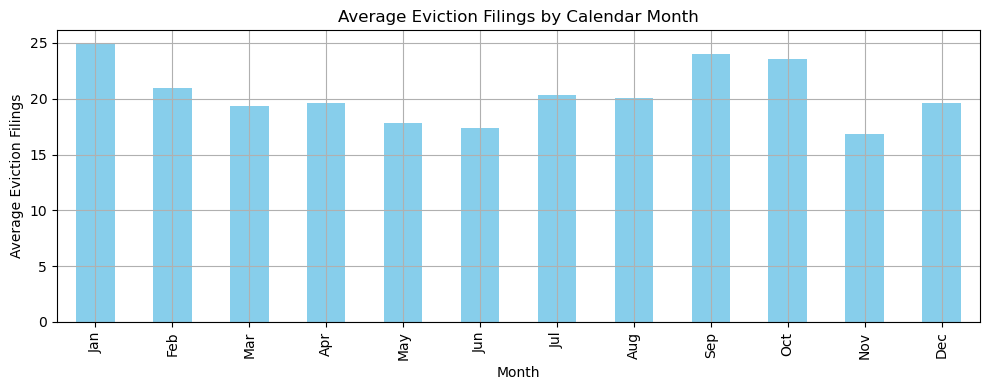

In [65]:
# Extract month name and year from period
model_df['month_str'] = model_df['month'].dt.strftime('%b')
model_df['year'] = model_df['month'].dt.year

# Plot average filings by calendar month
monthly_seasonality = (
    model_df.groupby('month_str')['filings_avg'].mean()
    .reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
)

plt.figure(figsize=(10, 4))
monthly_seasonality.plot(kind='bar', color='skyblue')
plt.title('Average Eviction Filings by Calendar Month')
plt.xlabel('Month')
plt.ylabel('Average Eviction Filings')
plt.grid(True)
plt.tight_layout()
plt.show()

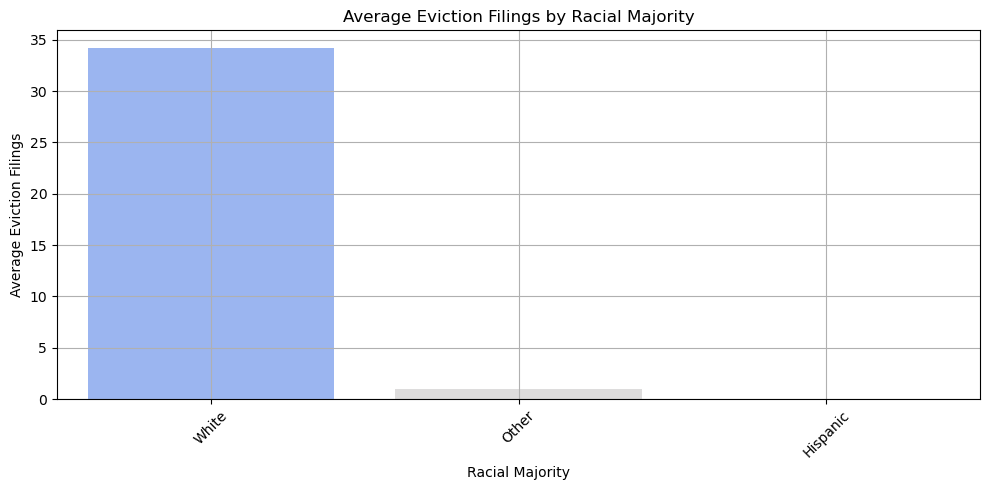

In [67]:
# Group by racial majority
racial_eviction = (
    model_df.groupby('racial_majority')['filings_avg']
    .mean().sort_values(ascending=False).reset_index()
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=racial_eviction, x='racial_majority', y='filings_avg', palette='coolwarm')
plt.title('Average Eviction Filings by Racial Majority')
plt.xlabel('Racial Majority')
plt.ylabel('Average Eviction Filings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
print(model_df.columns)

Index(['city', 'type', 'GEOID', 'racial_majority', 'month', 'filings_2020',
       'filings_avg', 'filings_avg_prepandemic_baseline', 'last_updated',
       'zori', 'unemp_rate', 'unemp_bin', 'month_str', 'year'],
      dtype='object')


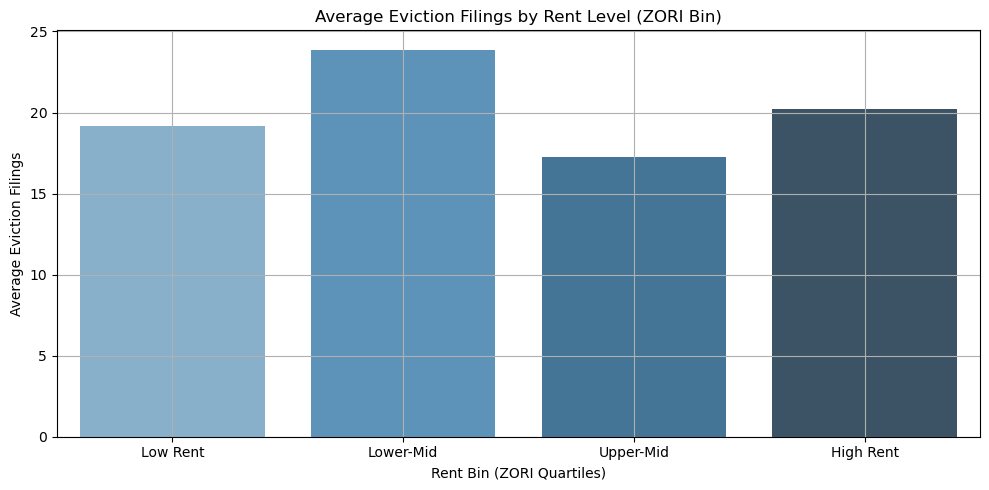

In [73]:
# Group by income bins
model_df['zori_bin'] = pd.qcut(model_df['zori'], q=4,
                               labels=['Low Rent', 'Lower-Mid', 'Upper-Mid', 'High Rent'])

# Average eviction filings by rent tier
eviction_by_zori = (
    model_df.groupby('zori_bin')['filings_avg']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=eviction_by_zori, x='zori_bin', y='filings_avg', palette='Blues_d')
plt.title('Average Eviction Filings by Rent Level (ZORI Bin)')
plt.xlabel('Rent Bin (ZORI Quartiles)')
plt.ylabel('Average Eviction Filings')
plt.grid(True)
plt.tight_layout()
plt.show()

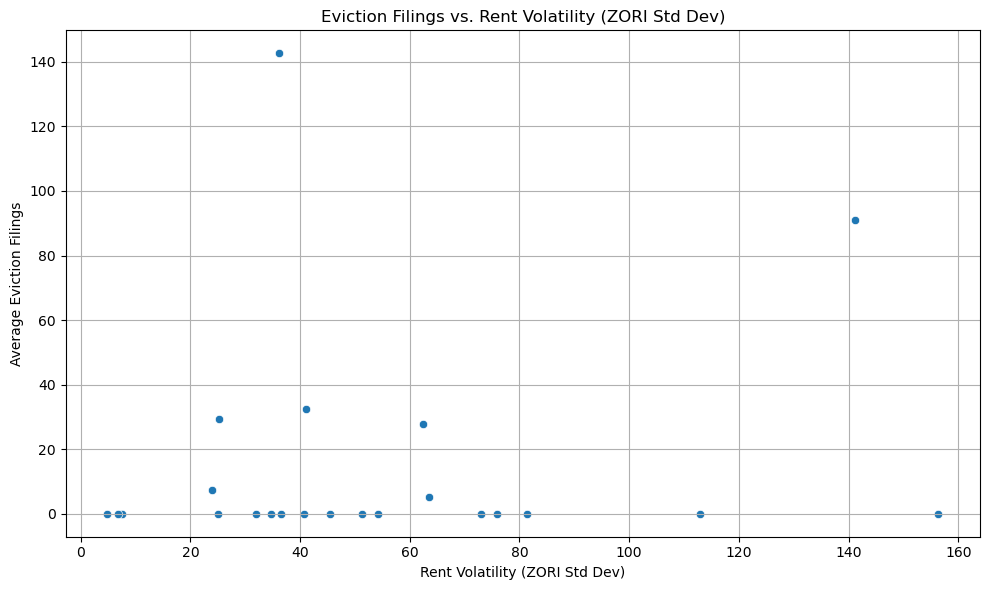

In [75]:
# Scatterplot: Volatility vs. Evictions
volatility_plot = model_df.groupby('GEOID')[['zori', 'filings_avg']].agg({
    'zori': 'std',
    'filings_avg': 'mean'
}).reset_index()

volatility_plot = volatility_plot.rename(columns={'zori': 'zori_std'})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=volatility_plot, x='zori_std', y='filings_avg')
plt.title('Eviction Filings vs. Rent Volatility (ZORI Std Dev)')
plt.xlabel('Rent Volatility (ZORI Std Dev)')
plt.ylabel('Average Eviction Filings')
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
# Set thresholds for top 10% volatility and filings
vol_threshold = volatility_plot['zori_std'].quantile(0.90)
evict_threshold = volatility_plot['filings_avg'].quantile(0.90)

# Filter for high-risk ZIPs
high_risk_zips = volatility_plot[
    (volatility_plot['zori_std'] > vol_threshold) &
    (volatility_plot['filings_avg'] > evict_threshold)
]

# Merge with city info
high_risk_zips = high_risk_zips.merge(
    model_df[['GEOID', 'city']].drop_duplicates(), on='GEOID', how='left'
)

# Display top risk ZIPs
high_risk_zips.sort_values(by='filings_avg', ascending=False).head(10)

,GEOID,zori_std,filings_avg,city
0,85345,141.091293,91.015385,"Phoenix, AZ"


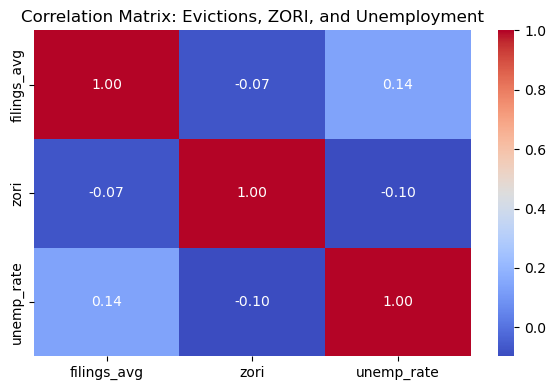

In [79]:
# Compute correlation matrix
correlation_matrix = model_df[["filings_avg", "zori", "unemp_rate"]].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Evictions, ZORI, and Unemployment")
plt.tight_layout()
plt.show()

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Select and preprocess input features
features = ["zori", "unemp_rate"]
X = model_df[features].dropna()
y = model_df.loc[X.index, "filings_avg"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

R²: 0.15
RMSE: 34.30


In [125]:
# Define features and target
features = [
    "zori", "unemp_rate", "zori_std", 
    "filings_avg_prepandemic_baseline", "zori_pressure", 
    "month_str", "racial_majority"
]
cat_cols = ["month_str", "racial_majority"]  # Categorical

# Prepare dataset
X = model_df[features].dropna()
y = model_df.loc[X.index, "filings_avg"]

# Confirm structure
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Missing in X:", X.isnull().sum().sum())
print("Missing in y:", y.isnull().sum())

X shape: (0, 7)
y shape: (0,)
Missing in X: 0
Missing in y: 0


In [127]:
# Check for nulls per feature
null_counts = model_df[features].isnull().sum()
total_rows = len(model_df)

print("Nulls per feature:\n")
print(null_counts)
print("\nPercent missing per feature:\n")
print((null_counts / total_rows * 100).round(2).astype(str) + '%')

Nulls per feature:

zori                                  0
unemp_rate                           24
zori_std                              1
filings_avg_prepandemic_baseline      0
zori_pressure                       482
month_str                             0
racial_majority                       0
dtype: int64

Percent missing per feature:

zori                                  0.0%
unemp_rate                           4.98%
zori_std                             0.21%
filings_avg_prepandemic_baseline      0.0%
zori_pressure                       100.0%
month_str                             0.0%
racial_majority                       0.0%
dtype: object


In [129]:
# Step 1: Reshape and clean national ZORI growth data
zori_national = datasets["zillow_national_growth"].copy()

# Melt wide to long format: move all date columns under one 'month' column
zori_national = zori_national.melt(
    id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "BaseDate"],
    var_name="month",
    value_name="zori_national"
)

# Convert 'month' to datetime and then to monthly period
zori_national["month"] = pd.to_datetime(zori_national["month"], errors="coerce")
zori_national["month"] = zori_national["month"].dt.to_period("M")

# Preview result
print(zori_national.head())
print("Unique periods in national ZORI:", zori_national["month"].nunique())

   RegionID  SizeRank     RegionName RegionType    BaseDate    month  \
0    102001         0  United States    country  2025-06-30  2025-07   
1    102001         0  United States    country  2025-06-30  2025-09   
2    102001         0  United States    country  2025-06-30  2026-06   

   zori_national  
0            0.4  
1            0.7  
2            1.9  
Unique periods in national ZORI: 3


In [131]:
# Step 2: Ensure ZIP-level model_df has compatible monthly period format
model_df["month"] = pd.to_datetime(model_df["month"], errors="coerce")
model_df["month"] = model_df["month"].dt.to_period("M")

# Optional: filter to rows that match the national ZORI periods (if needed)
national_months = zori_national["month"].unique()
model_df = model_df[model_df["month"].isin(national_months)]

# Preview the monthly alignment
print("Remaining ZIP-level months after filtering:", model_df["month"].nunique())
print(model_df["month"].value_counts().sort_index())

Remaining ZIP-level months after filtering: 0
Series([], Freq: M, Name: count, dtype: int64)


In [133]:
# Step 3: Check actual unique month values for each dataset
print("Unique months in national ZORI:")
print(zori_national["month"].unique())

print("\nUnique months in ZIP-level model_df:")
print(model_df["month"].unique())

Unique months in national ZORI:
<PeriodArray>
['2025-07', '2025-09', '2026-06']
Length: 3, dtype: period[M]

Unique months in ZIP-level model_df:
<PeriodArray>
[]
Length: 0, dtype: period[M]


In [135]:
# Step 4: Create fallback zori_pressure using latest national ZORI value
latest_value = zori_national.sort_values("month", ascending=False)["zori_national"].iloc[0]
model_df["zori_pressure"] = latest_value

# Confirm updated feature
print("Assigned fallback zori_pressure value:", latest_value)
print(model_df[["month", "zori_pressure"]].head())

Assigned fallback zori_pressure value: 1.9
Empty DataFrame
Columns: [month, zori_pressure]
Index: []


In [137]:
# Step 5: Recheck nulls before modeling
selected_features = [
    "zori", "unemp_rate", "zori_std",
    "filings_avg_prepandemic_baseline", "zori_pressure",
    "month_str", "racial_majority"
]

nulls_check = model_df[selected_features].isnull().sum()
print("Remaining nulls in selected features:\n", nulls_check)

Remaining nulls in selected features:
 zori                                0
unemp_rate                          0
zori_std                            0
filings_avg_prepandemic_baseline    0
zori_pressure                       0
month_str                           0
racial_majority                     0
dtype: int64


In [141]:
# Check all required features are present and non-null
features = [
    "zori", "unemp_rate", "zori_std",
    "filings_avg_prepandemic_baseline", "zori_pressure",
    "month_str", "racial_majority"
]

missing_cols = [col for col in features if col not in model_df.columns]
print("Missing columns:", missing_cols)

# Confirm shape before proceeding
X_check = model_df[features]
print("X_check shape:", X_check.shape)
print("Nulls in each feature:\n", X_check.isnull().sum())

Missing columns: []
X_check shape: (0, 7)
Nulls in each feature:
 zori                                0
unemp_rate                          0
zori_std                            0
filings_avg_prepandemic_baseline    0
zori_pressure                       0
month_str                           0
racial_majority                     0
dtype: int64


In [145]:
# Reconfirm shape and non-null status right before modeling
print("model_df shape:", model_df.shape)
print("model_df columns:", model_df.columns.tolist())

# View summary stats
print("\nSummary stats of selected features:")
print(model_df[features].describe(include='all'))

# Confirm nulls again
print("\nNulls in model_df (recheck):")
print(model_df[features].isnull().sum())

model_df shape: (0, 20)
model_df columns: ['city', 'type', 'GEOID', 'racial_majority', 'month', 'filings_2020', 'filings_avg', 'filings_avg_prepandemic_baseline', 'last_updated', 'zori', 'unemp_rate', 'unemp_bin', 'month_str', 'year', 'zori_bin', 'zori_std_x', 'zori_national', 'zori_pressure', 'zori_std_y', 'zori_std']

Summary stats of selected features:
       zori  unemp_rate  zori_std  filings_avg_prepandemic_baseline  \
count     0         0.0       0.0                               0.0   
unique    0         NaN       NaN                               NaN   
top     NaN         NaN       NaN                               NaN   
freq    NaN         NaN       NaN                               NaN   
mean    NaN         NaN       NaN                               NaN   
std     NaN         NaN       NaN                               NaN   
min     NaN         NaN       NaN                               NaN   
25%     NaN         NaN       NaN                               NaN   
50%

In [147]:
# 1. Reset month to datetime (in case it was coerced to Period earlier)
model_df["month"] = pd.to_datetime(model_df["month"], errors="coerce")

# 2. Assign fallback national pressure to only missing rows
latest_value = zori_national.sort_values("month", ascending=False)["zori_national"].iloc[0]
model_df["zori_pressure"] = model_df["zori_pressure"].fillna(latest_value)

# 3. Recheck final shape
print("Post-fill model_df shape:", model_df.shape)
print("Remaining nulls in zori_pressure:", model_df["zori_pressure"].isnull().sum())

Post-fill model_df shape: (0, 20)
Remaining nulls in zori_pressure: 0


In [153]:
# Step 1: Inspect categorical column values before encoding
print("Unique values in 'month_str':", model_df["month_str"].unique())
print("Unique values in 'racial_majority':", model_df["racial_majority"].unique())

# Confirm row count
print("Rows in model_df:", model_df.shape[0])

Unique values in 'month_str': []
Unique values in 'racial_majority': []
Rows in model_df: 0


In [155]:
# Check null count per feature
for col in features:
    missing = model_df[col].isnull().sum()
    total = model_df.shape[0]
    pct = (missing / total) * 100
    print(f"{col:<35} missing: {missing:>3} ({pct:.2f}%)")

zori                                missing:   0 (nan%)
unemp_rate                          missing:   0 (nan%)
zori_std                            missing:   0 (nan%)
filings_avg_prepandemic_baseline    missing:   0 (nan%)
zori_pressure                       missing:   0 (nan%)
month_str                           missing:   0 (nan%)
racial_majority                     missing:   0 (nan%)


In [157]:
print("model_df shape:", model_df.shape)
print("Expected columns in model_df:", model_df.columns.tolist())

model_df shape: (0, 20)
Expected columns in model_df: ['city', 'type', 'GEOID', 'racial_majority', 'month', 'filings_2020', 'filings_avg', 'filings_avg_prepandemic_baseline', 'last_updated', 'zori', 'unemp_rate', 'unemp_bin', 'month_str', 'year', 'zori_bin', 'zori_std_x', 'zori_national', 'zori_pressure', 'zori_std_y', 'zori_std']


In [159]:
# Step 3: Replace zori_pressure nulls without filtering entire DataFrame
latest_value = zori_national.sort_values("month", ascending=False)["zori_national"].iloc[0]

# Only fill where zori_pressure is missing
model_df["zori_pressure"] = model_df["zori_pressure"].fillna(latest_value)

# Final check
print("Final row count:", model_df.shape[0])
print("Remaining nulls in zori_pressure:", model_df["zori_pressure"].isnull().sum())

Final row count: 0
Remaining nulls in zori_pressure: 0


In [167]:
# Rebuild clean model_df from zip_month_merged (ensures all periods are preserved)
model_df = zip_month_merged.copy()

# Convert 'month' to Period if not already
model_df["month"] = pd.to_datetime(model_df["month"], errors="coerce")
model_df["month"] = model_df["month"].dt.to_period("M")

# Recompute national rent pressure
zori_national = datasets["zillow_national_growth"].copy()
zori_national = zori_national.melt(
    id_vars=["RegionID", "SizeRank", "RegionName", "RegionType", "BaseDate"],
    var_name="month", value_name="zori_national"
)
zori_national["month"] = pd.to_datetime(zori_national["month"], errors="coerce")
zori_national["month"] = zori_national["month"].dt.to_period("M")

# Merge with ZIP-level data
model_df = pd.merge(model_df, zori_national[["month", "zori_national"]], on="month", how="left")

# Compute zori_pressure
model_df["zori_pressure"] = model_df["zori"] - model_df["zori_national"]

# Fill any remaining nulls in zori_pressure with latest national ZORI
latest_value = zori_national.sort_values("month", ascending=False)["zori_national"].iloc[0]
model_df["zori_pressure"] = model_df["zori_pressure"].fillna(latest_value)

# Final shape check
print("✅ Rebuilt model_df shape:", model_df.shape)
print("Remaining nulls in zori_pressure:", model_df["zori_pressure"].isnull().sum())
print("Columns now available:\n", model_df.columns.tolist())

✅ Rebuilt model_df shape: (482, 12)
Remaining nulls in zori_pressure: 0
Columns now available:
 ['city', 'type', 'GEOID', 'racial_majority', 'month', 'filings_2020', 'filings_avg', 'filings_avg_prepandemic_baseline', 'last_updated', 'zori', 'zori_national', 'zori_pressure']


In [171]:
print("Available columns:\n", model_df.columns.tolist())

Available columns:
 ['city', 'type', 'GEOID', 'racial_majority', 'month', 'filings_2020', 'filings_avg', 'filings_avg_prepandemic_baseline', 'last_updated', 'zori', 'zori_national', 'zori_pressure']


In [175]:
# Confirm all feature columns are in the DataFrame
features = [
    "zori", "unemp_rate", "zori_std",
    "filings_avg_prepandemic_baseline", "zori_pressure",
    "month_str", "racial_majority"
]

# Drop missing ones and warn if any missing
features_present = [col for col in features if col in model_df.columns]
missing = list(set(features) - set(features_present))
if missing:
    print("Warning: Missing features excluded:", missing)

X = model_df[features_present].dropna()
y = model_df.loc[X.index, "filings_avg"]

In [177]:
# Recalculate or re-merge ZORI volatility by ZIP
zori_volatility = zip_month_merged.groupby("GEOID")["zori"].std().reset_index(name="zori_std")

# Merge into model_df
model_df = model_df.merge(zori_volatility, on="GEOID", how="left")

In [179]:
# Recreate and re-merge unemployment rate if missing
df_bls = datasets["bls_unemployment"].copy()
df_bls["month"] = pd.to_datetime(df_bls["Year"].astype(str) + "-" + df_bls["Period"], format="%Y-%m", errors="coerce").dt.to_period("M")
df_bls = df_bls.rename(columns={"unemployment rate": "unemp_rate"})

# Merge into model_df
model_df = model_df.merge(df_bls[["month", "unemp_rate"]], on="month", how="left")

In [181]:
# Ensure 'month' is datetime, then create 'month_str'
model_df["month_str"] = pd.to_datetime(model_df["month"].astype(str)).dt.strftime("%b")

In [205]:
# Step 1: Define and check feature list
features = [
    "zori", "unemp_rate", "zori_std",
    "filings_avg_prepandemic_baseline", "zori_pressure",
    "month_str", "racial_majority"
]

# Identify categorical and numerical features
cat_cols = ["month_str", "racial_majority"]
num_cols = list(set(features) - set(cat_cols))

# Ensure all features exist in model_df
features_present = [col for col in features if col in model_df.columns]
missing = list(set(features) - set(features_present))
if missing:
    print("Warning: Missing features excluded:", missing)

# Step 2: Extract X and y
X = model_df[features_present].copy()
y = model_df["filings_avg"]

# Step 3: Imputation and encoding
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numeric transformer with imputation
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Categorical transformer with encoding
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, [col for col in num_cols if col in X.columns]),
        ("cat", categorical_transformer, [col for col in cat_cols if col in X.columns])
    ]
)

# Step 4: Transform features
X_processed = preprocessor.fit_transform(X)

# Step 5: Group-aware Train/Test Split to prevent data leakage by ZIP (GEOID)
from sklearn.model_selection import GroupShuffleSplit

# Use GEOID as the group key
group_key = model_df.loc[X.index, "GEOID"]

splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(X_processed, y, groups=group_key))

# Index X_processed and y accordingly
X_train, X_test = X_processed[train_idx], X_processed[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Step 6: Train and evaluate model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Grouped Split Model")
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

Grouped Split Model
R²: 0.41
RMSE: 36.84


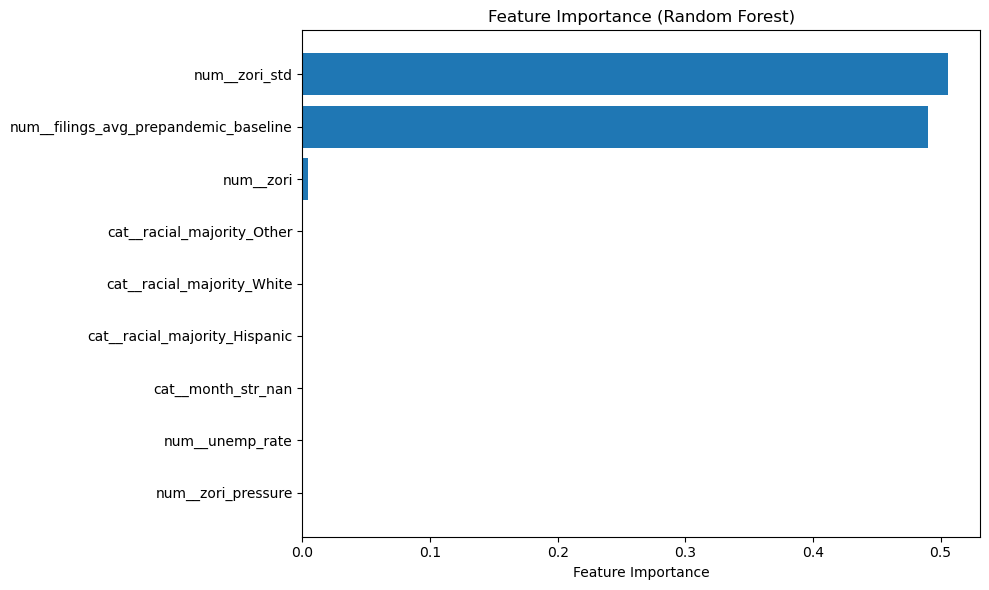

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Get importances
importances = rf.feature_importances_

# Sort
indices = np.argsort(importances)[::-1]
sorted_names = feature_names[indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_names, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

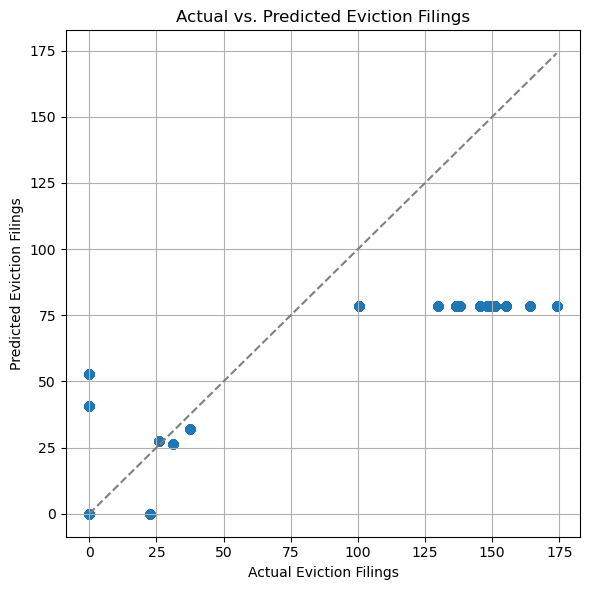

In [209]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="gray")
plt.xlabel("Actual Eviction Filings")
plt.ylabel("Predicted Eviction Filings")
plt.title("Actual vs. Predicted Eviction Filings")
plt.grid(True)
plt.tight_layout()
plt.show()

In [213]:
# Enhanced feature list (includes target-adjacent feature)
features = [
    "zori", "unemp_rate", "zori_std",
    "zori_pressure", "filings_avg_prepandemic_baseline",
    "month_str", "racial_majority"
]

cat_cols = ["month_str", "racial_majority"]
num_cols = list(set(features) - set(cat_cols))

# Filter X and y
X = model_df[features].copy()
y = model_df["filings_avg"]

# Imputation & encoding setup
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, [c for c in num_cols if c in X.columns]),
        ("cat", categorical_transformer, [c for c in cat_cols if c in X.columns])
    ]
)

# Transform features
X_processed = preprocessor.fit_transform(X)

# Group-aware split on GEOID
from sklearn.model_selection import GroupShuffleSplit

group_key = model_df.loc[X.index, "GEOID"]
splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(X_processed, y, groups=group_key))

X_train, X_test = X_processed[train_idx], X_processed[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Train & evaluate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Enhanced Model with Group Split")
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

Enhanced Model with Group Split
R²: 0.41
RMSE: 36.84


In [215]:
# Cross-validation with grouped folds
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GroupKFold

# Use 5 grouped folds by GEOID
group_kfold = GroupKFold(n_splits=5)
groups = model_df.loc[X.index, "GEOID"]

# Wrap full model in pipeline
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))

# Run cross-validation
cv_results = cross_validate(
    pipeline, X, y,
    groups=groups,
    cv=group_kfold,
    scoring=("r2", "neg_root_mean_squared_error"),
    return_train_score=True
)

# Output summary
print("Cross-Validation Results (Grouped by GEOID):")
print(f"Mean R²:  {cv_results['test_r2'].mean():.2f}")
print(f"Mean RMSE: {-cv_results['test_neg_root_mean_squared_error'].mean():.2f}")

Cross-Validation Results (Grouped by GEOID):
Mean R²:  0.10
Mean RMSE: 12.92


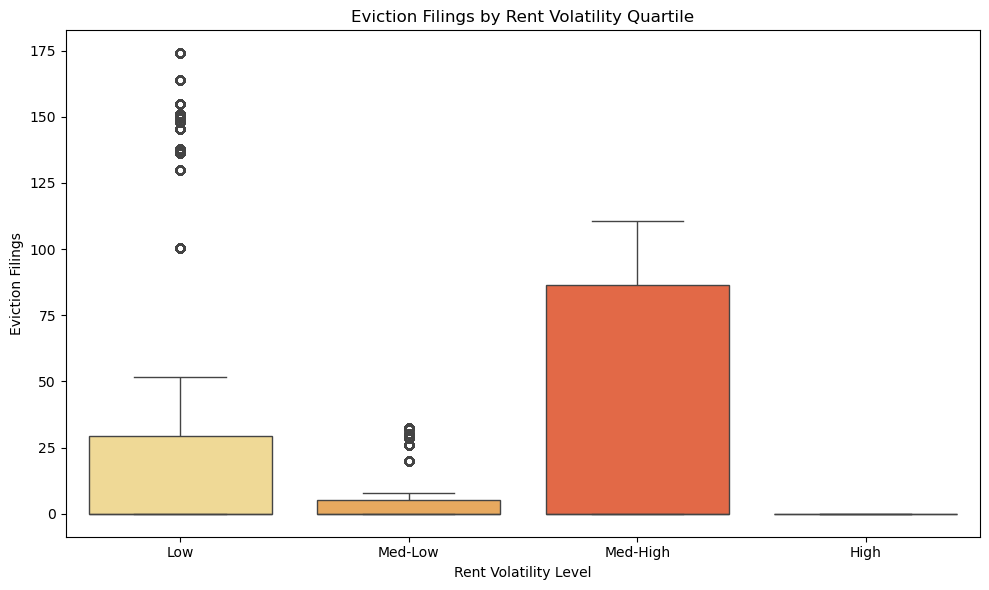

In [235]:
# Bin volatility into quartiles
model_df["volatility_bin"] = pd.qcut(model_df["zori_std"], 4, labels=["Low", "Med-Low", "Med-High", "High"])

# Plot
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="volatility_bin", y="filings_avg", data=model_df, palette="YlOrRd")
plt.title("Eviction Filings by Rent Volatility Quartile")
plt.xlabel("Rent Volatility Level")
plt.ylabel("Eviction Filings")
plt.tight_layout()
plt.show()

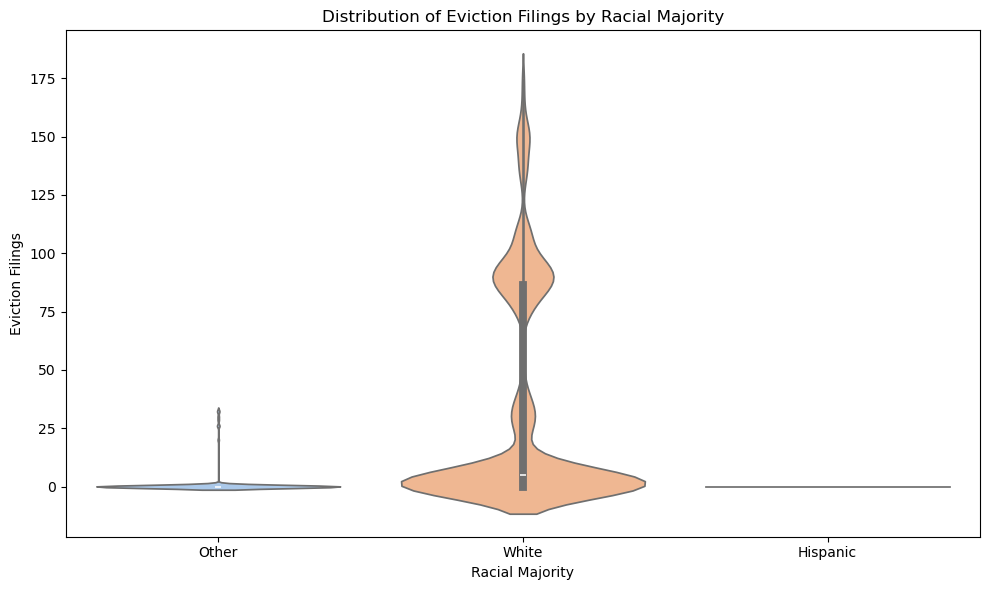

In [237]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="racial_majority", y="filings_avg", data=model_df, palette="pastel")
plt.title("Distribution of Eviction Filings by Racial Majority")
plt.xlabel("Racial Majority")
plt.ylabel("Eviction Filings")
plt.tight_layout()
plt.show()

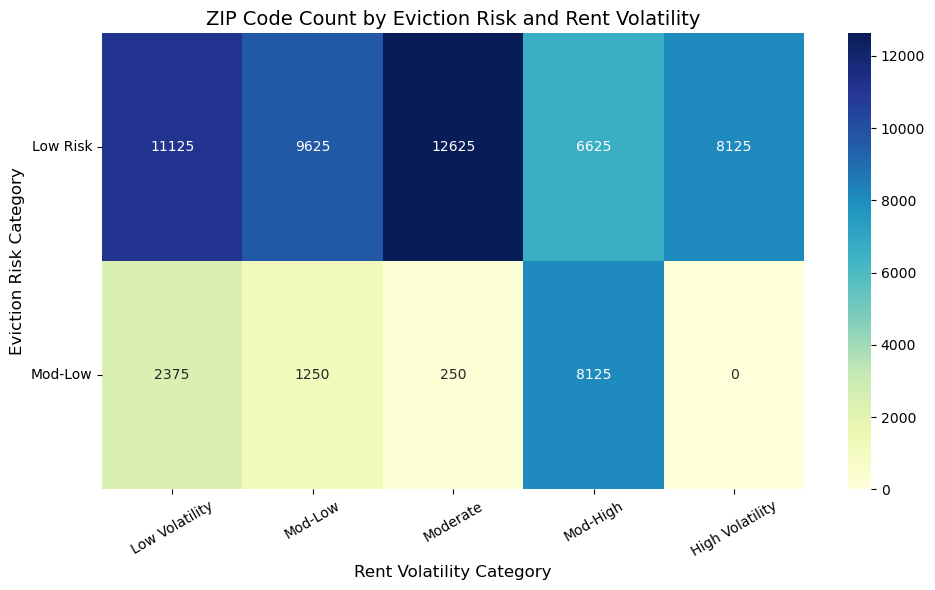

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use qcut with duplicates='drop' and let it bin naturally
risk_bins = pd.qcut(model_df["filings_avg"], q=5, duplicates="drop")
vol_bins = pd.qcut(model_df["zori_std"], q=5, duplicates="drop")

# Assign readable labels to the binned intervals
model_df["risk_bin"] = risk_bins.map({
    interval: label for interval, label in zip(risk_bins.cat.categories, 
        ["Low Risk", "Mod-Low", "Moderate", "Mod-High", "High Risk"][:len(risk_bins.cat.categories)])
})

model_df["vol_bin"] = vol_bins.map({
    interval: label for interval, label in zip(vol_bins.cat.categories, 
        ["Low Volatility", "Mod-Low", "Moderate", "Mod-High", "High Volatility"][:len(vol_bins.cat.categories)])
})

# Create the cross-tab
heatmap_df = pd.crosstab(model_df["risk_bin"], model_df["vol_bin"])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("ZIP Code Count by Eviction Risk and Rent Volatility", fontsize=14)
plt.xlabel("Rent Volatility Category", fontsize=12)
plt.ylabel("Eviction Risk Category", fontsize=12)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()